In [4]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "InstitutionalInvestorsBuySell",
    "stock_id": "2330",
    "date": "2020-04-01",
}
data = requests.get(url, params=parameter)
data = data.json()
data = pd.DataFrame(data['data'])
data

,date,stock_id,buy,name,sell
0,2020-04-01,2330,189000,Dealer_Hedging,493500
1,2020-04-01,2330,79000,Dealer_self,807000
2,2020-04-01,2330,0,Foreign_Dealer_Self,0
3,2020-04-01,2330,31304729,Foreign_Investor,29057663
4,2020-04-01,2330,900000,Investment_Trust,239000
...,...,...,...,...,...
900,2020-12-22,2330,8666343,Foreign_Investor,12179909
901,2020-12-22,2330,0,Foreign_Dealer_Self,0
902,2020-12-22,2330,99800,Investment_Trust,17000
903,2020-12-22,2330,114000,Dealer_self,290285


In [11]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [14]:
df = data[data['name']=='Dealer_Hedging']

In [22]:
name = data.name.unique()

array(['Dealer_Hedging', 'Dealer_self', 'Foreign_Dealer_Self',
       'Foreign_Investor', 'Investment_Trust'], dtype=object)

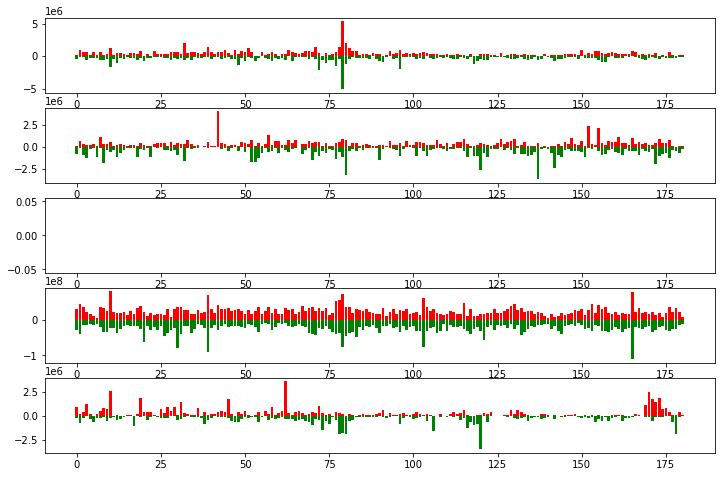

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,8))
name = data.name.unique()
for i, obj in enumerate(name):
    df = data[data['name']==obj]
    ax = plt.subplot(len(name), 1, i+1)
    ax.bar(np.arange(len(df.index)), df.buy, color='red')
    ax.bar(np.arange(len(df.index)), -df.sell, color='green')
plt.show()

In [45]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "TaiwanStockInfo",
}
resp = requests.get(url, params=parameter)
data = resp.json()
data = pd.DataFrame(data["data"])
data[data['stock_id']=='2330'].stock_name.values[0]

'台積電'

In [48]:
import requests
import pandas as pd

url = 'https://api.finmindtrade.com/api/v3/data?dataset=USStockInfo'
data = requests.get(url)
data = data.json()
data = pd.DataFrame(data['data'])
a = data['stock_id'].unique()

In [6]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "stock_id": "2330",
    "date": "2020-04-02",
    "end_date": "2020-04-12",
}
resp = requests.get(url, params=parameter)
data = resp.json()
data = pd.DataFrame(data["data"])
data

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,2020-04-06,2330,59712754,16324198154,273.0,275.5,270.0,275.5,4.0,19971.0
1,2020-04-07,2330,48887346,13817936851,283.5,284.0,280.5,283.0,7.5,24281.0
2,2020-04-08,2330,38698826,11016972354,285.0,285.5,283.0,285.0,2.0,19126.0
3,2020-04-09,2330,29276430,8346209654,287.5,288.0,282.5,283.0,-2.0,15271.0
4,2020-04-10,2330,28206858,7894277586,280.0,282.0,279.0,279.5,-3.5,15833.0


In [11]:
import requests
import pandas as pd

url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "TaiwanStockPriceMinute",
    "stock_id": "2330",
    "date": "2020-12-11"
}
resp = requests.get(url, params=parameter)
data = resp.json()
data = pd.DataFrame(data["data"])
data.

,date,stock_id,deal_price,volume,Time,TickType
0,2020-12-11,2330,521.0,498,08:30:27.036,0
1,2020-12-11,2330,512.0,554,08:31:42.197,0
2,2020-12-11,2330,512.0,554,08:31:47.210,0
3,2020-12-11,2330,512.0,561,08:31:52.225,0
4,2020-12-11,2330,512.0,561,08:31:57.239,0
...,...,...,...,...,...,...
12683,2020-12-11,2330,517.0,4865,13:29:42.442,0
12684,2020-12-11,2330,516.0,4877,13:29:47.460,0
12685,2020-12-11,2330,516.0,4914,13:29:52.480,0
12686,2020-12-11,2330,516.0,4916,13:29:57.499,0


In [15]:
import requests
import pandas as pd

url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "TaiwanStockPriceMinuteBidAsk",
    "stock_id": "2330",
}
resp = requests.get(url, params=parameter)
data = resp.json()["data"]
# if data['date'] == []:
#     data.pop('date', None)
data = pd.DataFrame(data)
data


,stock_id,AskPrice,AskVolume,BidPrice,BidVolume,Time,date
0,2330,"[514.0, 515.0, 516.0, 517.0, 518.0]","[93, 572, 1193, 739, 740]","[513.0, 512.0, 511.0, 510.0, 509.0]","[399, 395, 240, 618, 426]",13:24:56.624397,
1,2330,"[514.0, 515.0, 516.0, 517.0, 518.0]","[93, 572, 1193, 740, 739]","[513.0, 512.0, 511.0, 510.0, 509.0]","[399, 395, 240, 618, 426]",13:24:56.787773,
2,2330,"[514.0, 515.0, 516.0, 517.0, 518.0]","[93, 572, 1193, 740, 739]","[513.0, 512.0, 511.0, 510.0, 509.0]","[399, 394, 240, 618, 426]",13:24:57.017591,
3,2330,"[514.0, 515.0, 516.0, 517.0, 518.0]","[93, 572, 1193, 740, 739]","[513.0, 512.0, 511.0, 510.0, 509.0]","[391, 394, 240, 618, 426]",13:24:57.028056,
4,2330,"[514.0, 515.0, 516.0, 517.0, 518.0]","[94, 572, 1193, 740, 739]","[513.0, 512.0, 511.0, 510.0, 509.0]","[391, 394, 240, 618, 426]",13:24:57.155169,
...,...,...,...,...,...,...,...
95,2330,"[512.0, 513.0, 514.0, 515.0, 516.0]","[850, 991, 87, 424, 1212]","[511.0, 510.0, 509.0, 508.0, 507.0]","[488, 839, 495, 748, 444]",13:29:53.175087,
96,2330,"[512.0, 513.0, 514.0, 515.0, 516.0]","[769, 991, 88, 425, 1212]","[511.0, 510.0, 509.0, 508.0, 507.0]","[493, 838, 494, 748, 443]",13:29:58.195686,
97,2330,"[512.0, 513.0, 514.0, 515.0, 516.0]","[677, 991, 91, 424, 1213]","[511.0, 510.0, 509.0, 508.0, 507.0]","[506, 837, 494, 747, 443]",13:30:00.000000,
98,2330,"[512.0, 513.0, 514.0, 515.0, 516.0]","[677, 991, 91, 424, 1213]","[511.0, 510.0, 509.0, 508.0, 507.0]","[506, 837, 494, 747, 443]",13:30:00.000000,


In [19]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "TaiwanVariousIndicators5Seconds",
    "date": "2020-07-01",
}
data = requests.get(url, params=parameter)
data = data.json()
data = pd.DataFrame(data['data'])
data

,date,TAIEX
0,2020-07-01 09:00:00,11621.2
1,2020-07-01 09:00:05,11622.6
2,2020-07-01 09:00:10,11632.4
3,2020-07-01 09:00:15,11643.5
4,2020-07-01 09:00:20,11644.2
...,...,...
3236,2020-07-01 13:29:40,11691.2
3237,2020-07-01 13:29:45,11691.2
3238,2020-07-01 13:29:50,11691.2
3239,2020-07-01 13:29:55,11691.2


In [2]:
import requests
import pandas as pd
url = "https://api.finmindtrade.com/api/v3/data"
parameter = {
    "dataset": "TaiwanStockNews",
    "data_id":"2330",
    "date": "2020-12-15",
}
data = requests.get(url, params=parameter)
data = data.json()
data = pd.DataFrame(data['data'])
data

,date,stock_id,link,source,title
0,2020-12-15 00:01:18,2330,https://technews.tw/2020/12/15/tsmcs-12-inch-f...,科技新報 TechNews,傳台積電12 吋晶圓代工變相漲價，官方不予置評 - 科技新報 TechNews
1,2020-12-15 00:16:35,2330,https://technews.tw/2020/12/15/tsmcs-12-inch-f...,科技新報 TechNews,傳台積電12 吋晶圓代工變相漲價，官方不予置評 - 科技新報 TechNews
2,2020-12-15 00:30:15,2330,https://udn.com/news/story/7333/5093112,udn OOPS! 新鮮事,前台積電營運長！陸媒：蔣尚義下個月將出任中芯國際副董 - udn OOPS! 新鮮事
3,2020-12-15 01:14:47,2330,https://www.chinatimes.com/realtimenews/202012...,中時新聞網 Chinatimes.com,台積電除息前 外資圈論戰啟動 - 中時新聞網 Chinatimes.com
4,2020-12-15 02:00:32,2330,https://www.chinatimes.com/realtimenews/202012...,中時新聞網 Chinatimes.com,《半導體》除息秀搞神秘 台積電持續整理 - 中時新聞網 Chinatimes.com
...,...,...,...,...,...
182,2020-12-22 02:51:56,2330,https://udn.com/news/story/6839/5111597,UDN 聯合新聞網,台積電最大陸對手血流不止！台灣戰將「不爽走人」 明年怎拚晶圓代工？ - UDN 聯合新聞網
183,2020-12-22 03:20:00,2330,https://www.storm.mg/article/3316239,風傳媒,台積電再籌資！發行公司債185億，準備新建擴建廠房 - 風傳媒
184,2020-12-22 03:56:27,2330,https://ec.ltn.com.tw/article/breakingnews/338...,自由財經,中國官媒刊文：「大陸為什麼沒有台積電？」 - 自由財經
185,2020-12-22 04:11:12,2330,https://technews.tw/2020/12/22/tsmc-proposes-t...,科技新報 TechNews,全球競才時代，台積電建議提供租稅誘因引才 - 科技新報 TechNews
